In [7]:
!pip install --upgrade pip
!pip install librosa

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: pip in /home/brandon/.local/lib/python2.7/site-packages (20.0.2)
DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
Defaulting to user installation because normal site-packages is not writeable


In [8]:
import IPython.display as ipd

import librosa

import librosa.display

import matplotlib.pyplot as plt

import numpy as np

In [9]:
piano_c5 = "Piano.mf.C5.aiff"
violin_c5 = "Violin.arco.ff.sulG.C5.stereo.aif"
ipd.Audio(piano_c5)

### Final project: My attempt to make an algorithm to differentiate piano from violin (Or other instruments possibly)

In [10]:
piano_data,piano_sample_rate1 = librosa.load(piano_c5, sr=22050, mono=True, offset=0.0, duration=50, res_type='kaiser_best')
violin_data,violin_sample_rate1 = librosa.load(violin_c5, sr=22050, mono=True, offset=0.0, duration=50, res_type='kaiser_best')

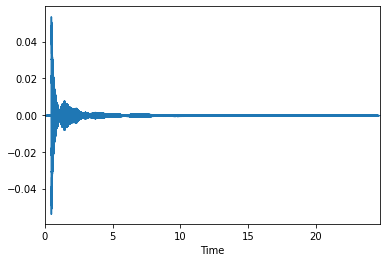

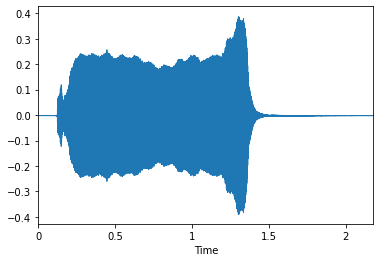

In [12]:
librosa.display.waveplot(piano_data,sr=piano_sample_rate1, max_points=50000.0, x_axis='time', offset=0.0, max_sr=1000)
plt.figure()
librosa.display.waveplot(violin_data,sr=violin_sample_rate1, max_points=50000.0, x_axis='time', offset=0.0, max_sr=1000)

In [13]:
def get_sample(instrument_data,offset,no_samples,compression):
    return instrument_data[offset:offset + no_samples * compression:compression]

### Get a bunch of random samples from each instrument to see what the data looks like

In [14]:
p_compress = 4
v_compress = 3
default_compression = 3
sample_length = 100

no_samples = 5

def get_plottable_data(data,offset,no_samples,compression):
    xs = np.linspace(offset,offset + no_samples * compression,no_samples)
    ys = get_sample(data,offset,no_samples,compression)
    return (xs,ys)

# Just to make it easier for me to plot
def get_plot(data,start):
    return get_plottable_data(data,start,sample_length,default_compression)

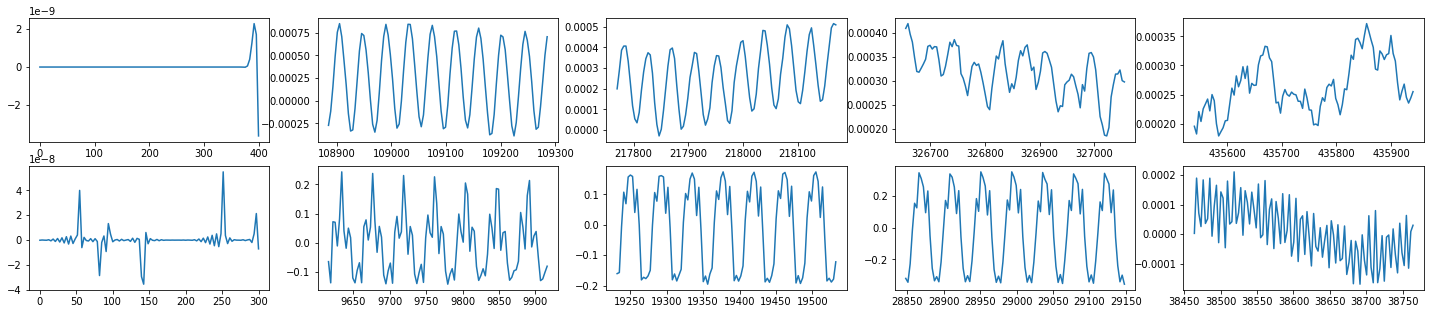

In [15]:
fig,a = plt.subplots(2,no_samples)
fig.set_size_inches(25,5)
for i in range(no_samples):
    p_location = int(len(piano_data) / no_samples) * i
    v_location = int(len(violin_data) / no_samples) * i
    p = get_plottable_data(piano_data,p_location,sample_length,p_compress)
    v = get_plottable_data(violin_data,v_location,sample_length,v_compress)
    a[0,i].plot(p[0],p[1])
    a[1,i].plot(v[0],v[1])

#### Want to get data of the note being played
Will attempt to do this by finding a period with the most 'noise'

In [16]:
def get_noisiest_x(data,sample_size,compression,no_points):
    def update_list(lst,n):
        for i in range(0,len(lst),step=compression):
            if(n[0] > lst[i][0]):
                lst.insert(i,n)
                if(len(lst) > no_points):
                    lst.pop()
                return;
        lst.append(n)
    noisiest = []
    d = abs(data)
    for i in range(len(data) - sample_size*compression):
        noise = np.sum(data[i:i+sample_size*compression:compression])
        update_list(noisiest,(noise,i))
    return noisiest[:,1]

p_noisiest = get_noisiest_x(piano_data,sample_length,p_compress,no_samples)
fig,a = plt.subplots(2,no_samples)
fig.set_size_inches(25,5)
for d in p_noisiest:
    p = get_plot(piano_data,d)
    a.plot(p[0],p[1])

TypeError: range() does not take keyword arguments